#Titanic Challenge - Kaggle
###Implementing a notebook to better understand data science best practices

####I - Import all necessary packages and libraries needed to complete the tasks

In [7]:
import sys #access to system parameters
print("Python version: {}".format(sys.version))

import pandas as pd ##collection of functions for data processing and analysis modeled after 
                    # R dataframes with SQL like features
print("\nPandas version: {}".format(pd.__version__))

import matplotlib
print("Matpltlib version: {}".format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython.display import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print('Input Data Files:\n' + check_output(["ls", "../rmsTitanic/input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


#Highly used modeling algorithms
from sklearn import \
    svm, tree, linear_model, \
    neighbors, naive_bayes, \
    ensemble, discriminant_analysis, \
    gaussian_process

from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas.tools.plotting

#show plots in Jupyter Notebook browser
%matplotlib inline 
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]



Pandas version: 0.23.2
Matpltlib version: 2.2.2
NumPy version: 1.14.5
SciPy version: 1.1.0
IPython version: 5.7.0


scikit-learn version: 0.19.1
-------------------------
Input Data Files:
gender_submission.csv
test.csv
train.csv



####II - Import Raw data into a pandas data frame and analyze the data at a high level.

In [14]:
#Import Data from csv file
data_raw = pd.read_csv('../rmsTitanic/input/train.csv')

#Use the test data provided for validation
data_val = pd.read_csv('../rmsTitanic/input/test.csv')

#Create a copy of the input data set
data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

#preview data
print(data_raw.info())
data_raw.sample(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S


####III - Clean and pre-process data

Correct, Complete, Create and Convert
	-- Correct: Correct any non-acceptable data inputs 
	-- Complete: Fill missing values and fields (Ex: Mode for categorical impute, mean/median for quantitative impute)
	-- Create: Add new features that will bring value to predicting the independent variable
	-- Covert: Convert to necessary format (Ex: Categorical to dummy vars, formatting dates, etc.)

In [15]:
## SUmmarize null values in the dataset

display("Null values in training data by column:", data1.isnull().sum() )

display("Null values in test data by column:", data_val.isnull().sum())

data_raw.describe(include= 'all')


'Null values in training data by column:'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Null values in test data by column:'

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
#Impute missing vals

for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode(), inplace=True)
    
#Deleting cabin feature column and Unique ID columns like PassengerId and Ticket from training data
deleteCols = ['PassengerId', 'Ticket', 'Cabin']
data1.drop(deleteCols, axis=1, inplace=True)

display(data1.isnull().sum())
display(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [17]:
## Create new features - feature engineering

for dataset in data_cleaner:
    #Family Size = Siblings/Spouse + Parents/Children + passenger
    dataset['familySize'] = dataset['SibSp']  + dataset['Parch'] + 1
    
    dataset['isAlone'] = 1 #Initialize feature to all true
    dataset['isAlone'].loc[dataset['familySize']>1] = 0
    
    #Splitting title from name of passenger
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    #Fare Bins -- 4
    dataset['fareBins'] = pd.qcut(dataset['Fare'], 4)
    #Age Bins -- 5
    dataset['ageBins'] = pd.qcut(dataset['Age'], 6)
    
#cleanup rare title names
title_names = (data1['Title'].value_counts() < 10)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

data1.head()

print('-'*20)

data1.info()

data_val.info()

display(data1.sample(10))

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
familySize    891 non-null int64
isAlone       891 non-null int64
Title         891 non-null object
fareBins      891 non-null category
ageBins       891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone,Title,fareBins,ageBins
228,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(0.419, 19.0]"
365,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,7.2500,S,1,1,Mr,"(-0.001, 7.91]","(28.0, 31.0]"
371,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,6.4958,S,2,0,Mr,"(-0.001, 7.91]","(0.419, 19.0]"
588,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(19.0, 25.0]"
653,1,3,"O'Leary, Miss. Hanora ""Norah""",female,28.0,0,0,7.8292,Q,1,1,Miss,"(-0.001, 7.91]","(25.0, 28.0]"
499,0,3,"Svensson, Mr. Olof",male,24.0,0,0,7.7958,S,1,1,Mr,"(-0.001, 7.91]","(19.0, 25.0]"
209,1,1,"Blank, Mr. Henry",male,40.0,0,0,31.0000,C,1,1,Mr,"(14.454, 31.0]","(31.0, 40.5]"
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,C,2,0,Mrs,"(14.454, 31.0]","(25.0, 28.0]"
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,164.8667,S,3,0,Mrs,"(31.0, 512.329]","(40.5, 80.0]"
509,1,3,"Lang, Mr. Fang",male,26.0,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(25.0, 28.0]"


In [18]:
# Convert to necessary format for mathematical analysis
label = LabelEncoder()

for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['ageBins'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['fareBins'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'familySize', 'isAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y:  ', data1_xy)


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'familySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y:  ', data1_xy_bin)

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y:  ', data1_xy_dummy)
data1_dummy.sample(10)



('Original X Y:  ', ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'familySize', 'isAlone'])
('Bin X Y:  ', ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'familySize', 'AgeBin_Code', 'FareBin_Code'])
('Dummy X Y:  ', ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'familySize', 'isAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'])


,Pclass,SibSp,Parch,Age,Fare,familySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
236,2,1,0,44.0,26.0000,2,0,0,1,0,0,1,0,0,0,1,0
770,3,0,0,24.0,9.5000,1,1,0,1,0,0,1,0,0,0,1,0
216,3,0,0,27.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
450,2,1,2,36.0,27.7500,4,0,0,1,0,0,1,0,0,0,1,0
490,3,1,0,28.0,19.9667,2,0,0,1,0,0,1,0,0,0,1,0
42,3,0,0,28.0,7.8958,1,1,0,1,1,0,0,0,0,0,1,0
541,3,4,2,9.0,31.2750,7,0,1,0,0,0,1,0,0,1,0,0
334,1,1,0,28.0,133.6500,2,0,1,0,0,0,1,0,0,0,0,1
205,3,0,1,2.0,10.4625,2,0,1,0,0,0,1,0,0,1,0,0
699,3,0,0,42.0,7.6500,1,1,0,1,0,0,1,0,0,0,1,0


Double Check data cleaning

In [19]:
print('Train columns with null values:')
display(data1.isnull().sum())
print("-"*10)
data1.info()
print("-"*10)

print('Test/Validation columns with null values:' )
display(data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:


Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
familySize       0
isAlone          0
Title            0
fareBins         0
ageBins          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
Title_Code       0
dtype: int64

----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
familySize       891 non-null int64
isAlone          891 non-null int64
Title            891 non-null object
fareBins         891 non-null category
ageBins          891 non-null category
Sex_Code         891 non-null int64
Embarked_Code    891 non-null int64
AgeBin_Code      891 non-null int64
FareBin_Code     891 non-null int64
Title_Code       891 non-null int64
dtypes: category(2), float64(2), int64(11), object(4)
memory usage: 120.3+ KB
----------
Test/Validation columns with null values:


PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
familySize         0
isAlone            0
Title              0
fareBins           0
ageBins            0
Sex_Code           0
Embarked_Code      0
AgeBin_Code        0
FareBin_Code       0
Title_Code         0
dtype: int64

----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
familySize       418 non-null int64
isAlone          418 non-null int64
Title            418 non-null object
fareBins         418 non-null category
ageBins          418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
Title_Code       418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB
None
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)

train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,familySize,AgeBin_Code,FareBin_Code
105,1,3,4,3,1,2,0
68,0,3,4,2,7,0,1
253,1,3,4,3,2,3,2
320,1,3,4,3,1,1,0
706,0,2,4,4,1,5,1


####IV - Exploratory Data Analysis

In [22]:
#Variable corelation with survival
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival correlation by: %s' % x)
        display(data1[[x, Target[0]]].groupby(x, as_index= True).mean())
        print('-'*10 + '\n')
    
#Crosstab view example
print('Crosstab View example:')
display(pd.crosstab(data1['Title'], data1[Target[0]]))


Survival correlation by: Sex


,Survived
Sex,
female,0.742038
male,0.188908


----------

Survival correlation by: Pclass


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


----------

Survival correlation by: Embarked


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


----------

Survival correlation by: Title


,Survived
Title,
Master,0.575000
Misc,0.444444
Miss,0.697802
Mr,0.156673
Mrs,0.792000


----------

Survival correlation by: SibSp


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


----------

Survival correlation by: Parch


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


----------

Survival correlation by: familySize


,Survived
familySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


----------

Survival correlation by: isAlone


,Survived
isAlone,
0,0.505650
1,0.303538


----------

Crosstab View example:


Survived,0,1
Title,,
Master,17,23
Misc,15,12
Miss,55,127
Mr,436,81
Mrs,26,99


Text(0,0.5,'Fam Size (#)')

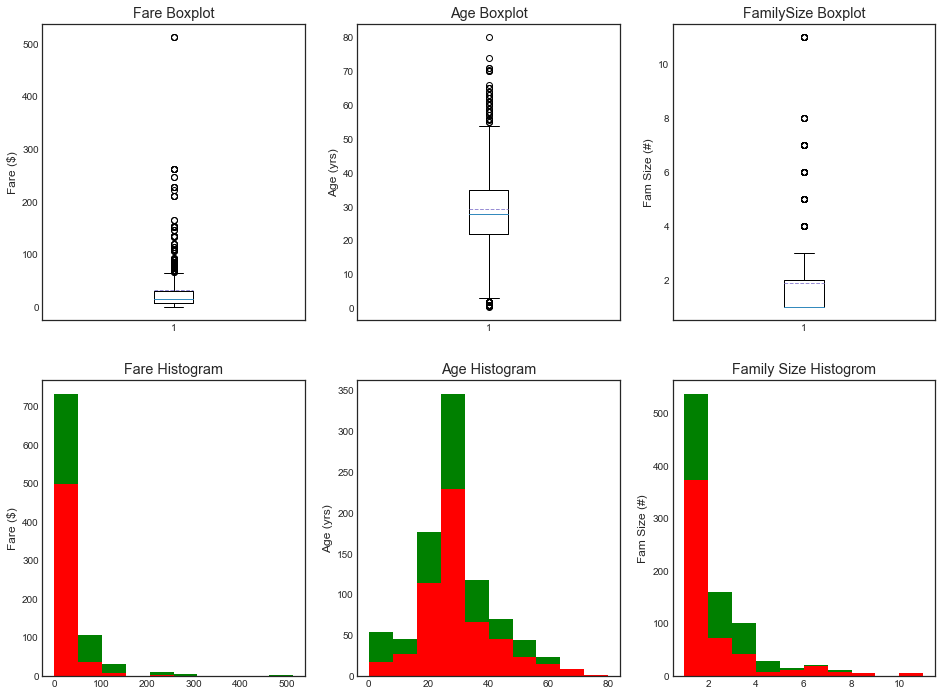

In [29]:
##Data Visualization

#Plot quantitative data

plt.figure(figsize=[16,12]) #Set graph size

plt.subplot(231)
plt.boxplot(data1['Fare'], showmeans = True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (yrs)')

plt.subplot(233)
plt.boxplot(data1['familySize'] , showmeans = True, meanline=True)
plt.title('FamilySize Boxplot')
plt.ylabel('Fam Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==0]['Fare'], data1[data1['Survived']==1]['Fare']], stacked=True, color = ['r','g'], label = ['Survived','Dead'])
plt.title('Fare Histogram')
plt.ylabel('Fare ($)')

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==0]['Age'], data1[data1['Survived']==1]['Age']], stacked=True, color = ['r','g'], label = ['Survived','Dead'])
plt.title('Age Histogram')
plt.ylabel('Age (yrs)')

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==0]['familySize'], data1[data1['Survived']==1]['familySize']], 
         stacked=True, color = ['r','g'], label = ['Survived','Dead'])
plt.title('Family Size Histogrom')
plt.ylabel('Fam Size (#)')

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'familySize', 'isAlone', 'Title', 'fareBins',
       'ageBins', 'Sex_Code', 'Embarked_Code', 'AgeBin_Code',
       'FareBin_Code', 'Title_Code'], dtype=object)

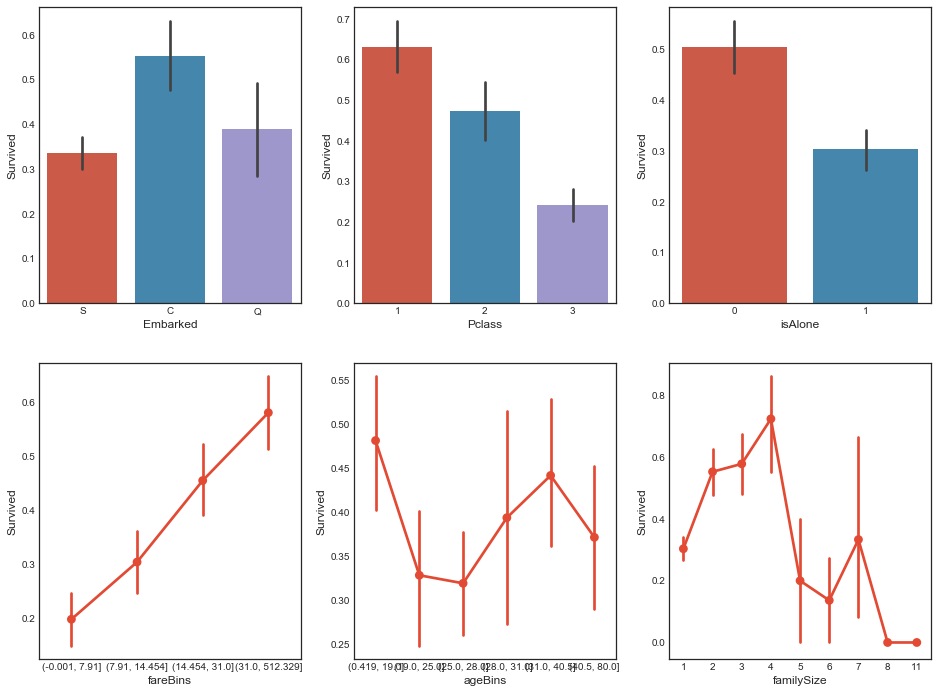

In [30]:
#Use Seaborn library for multi-variate comparison

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data = data1, ax=saxis[0,0])
sns.barplot(x = 'Pclass', y='Survived', data= data1, ax=saxis[0,1])
sns.barplot(x = 'isAlone', y='Survived', data= data1, ax=saxis[0,2])

sns.pointplot(x = 'fareBins', y = 'Survived', data = data1, ax = saxis[1,0])
sns.pointplot(x = 'ageBins', y = 'Survived', data = data1, ax = saxis[1,1])
sns.pointplot(x = 'familySize', y = 'Survived', data = data1, ax = saxis[1,2])


data1.columns.values

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

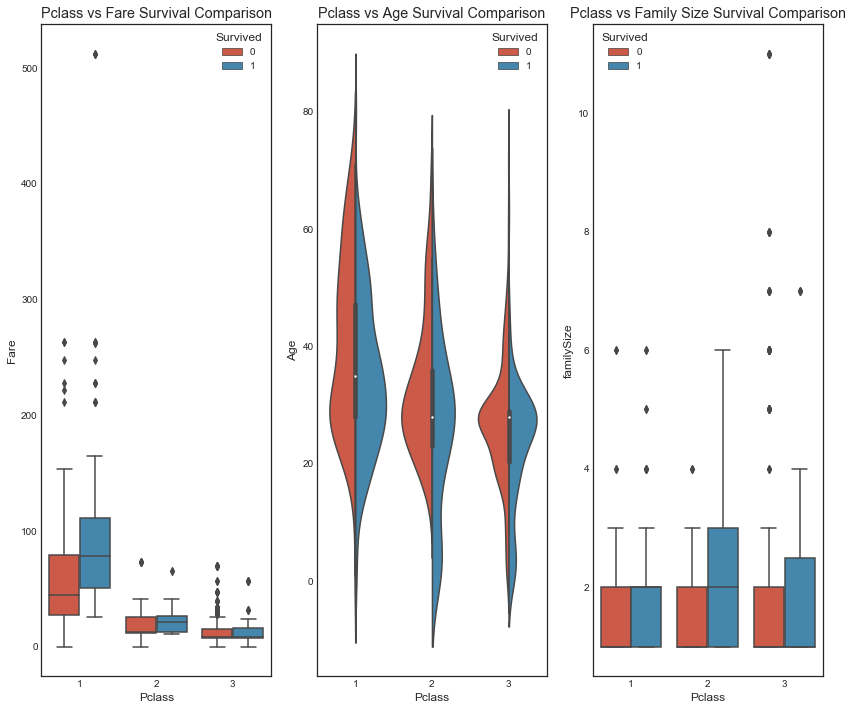

In [31]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='familySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

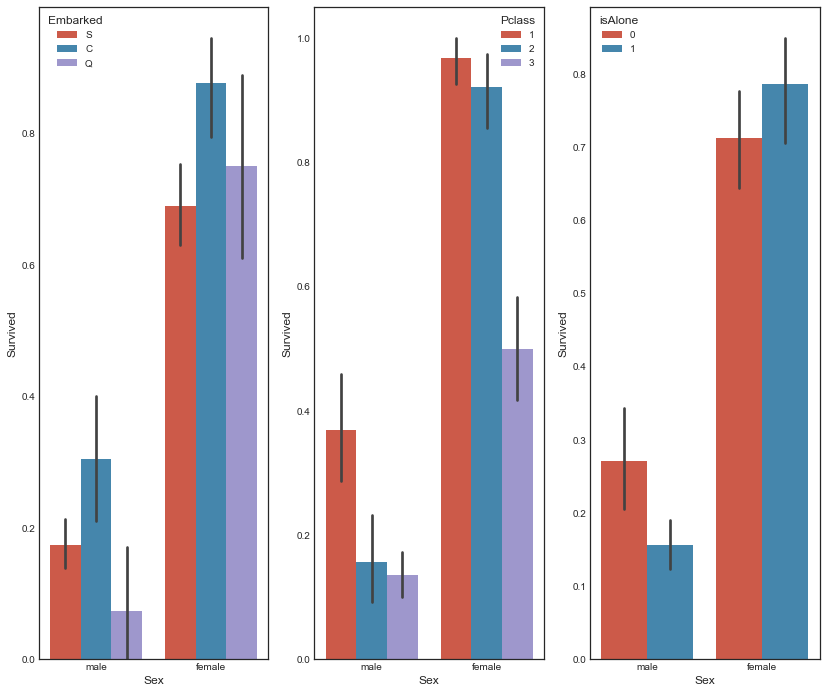

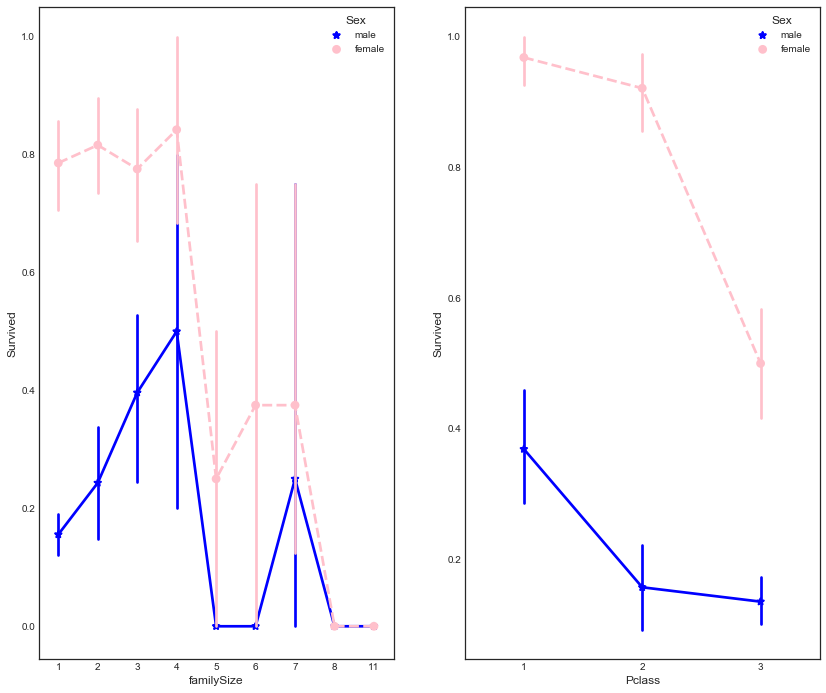

In [33]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'isAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="familySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)


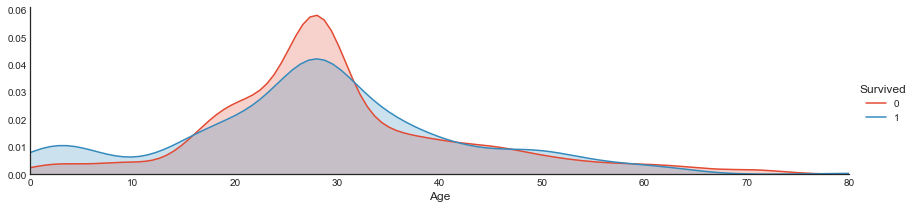

In [34]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

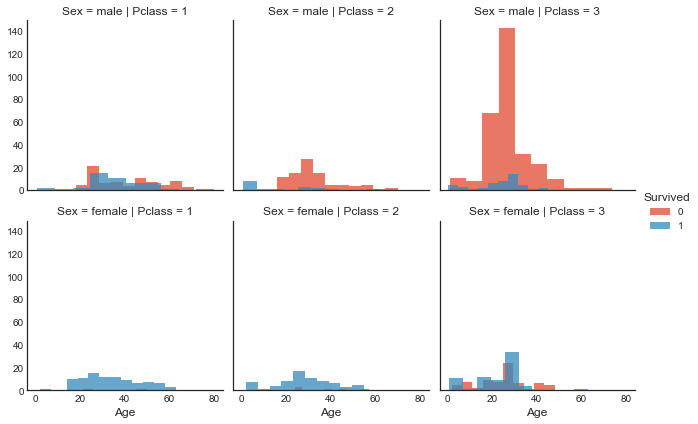

In [35]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

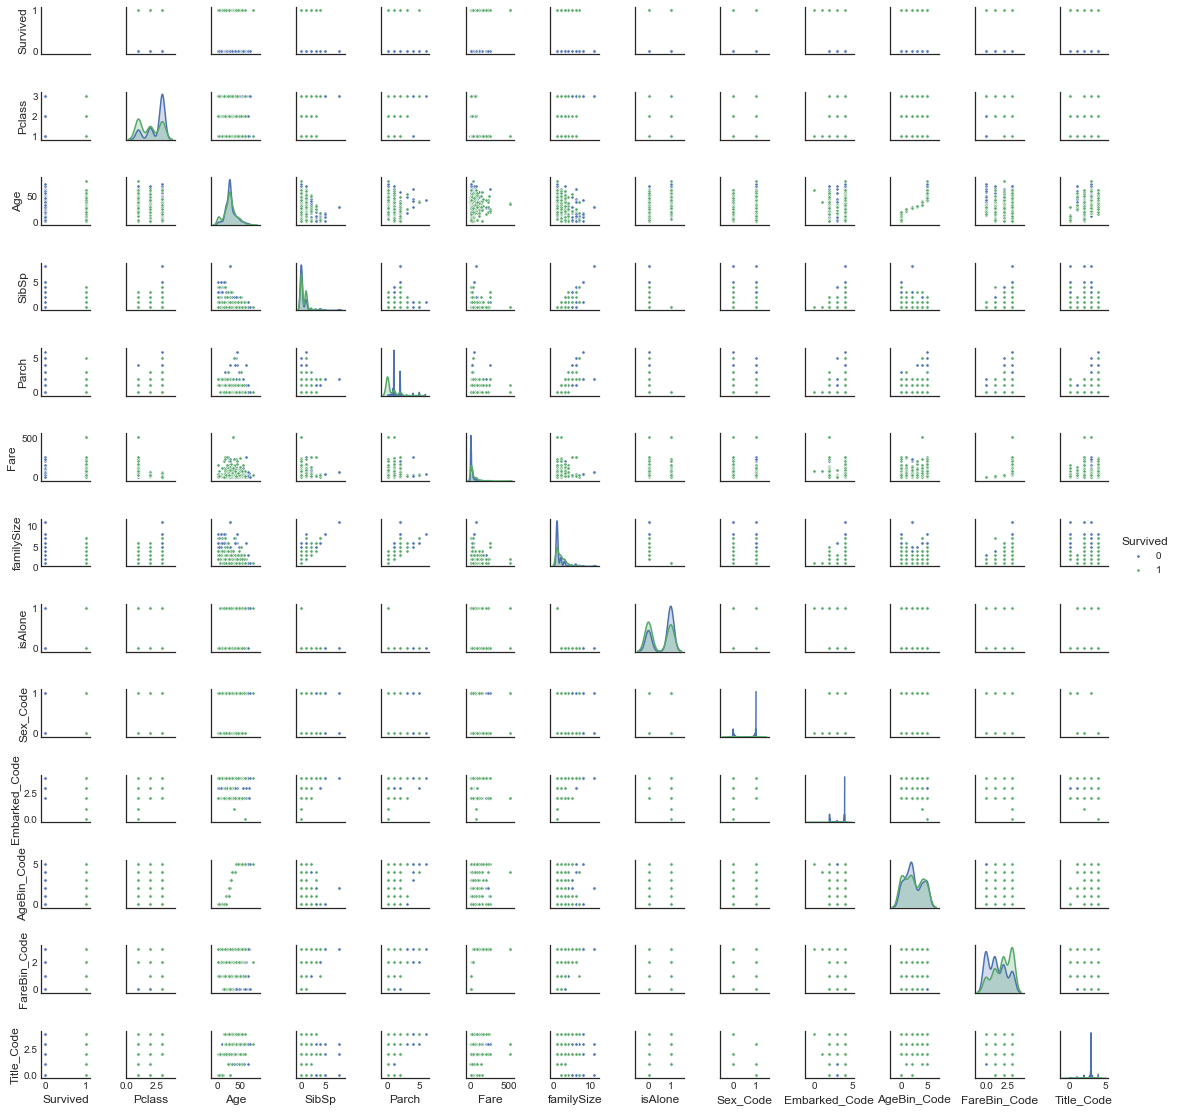

In [69]:
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )


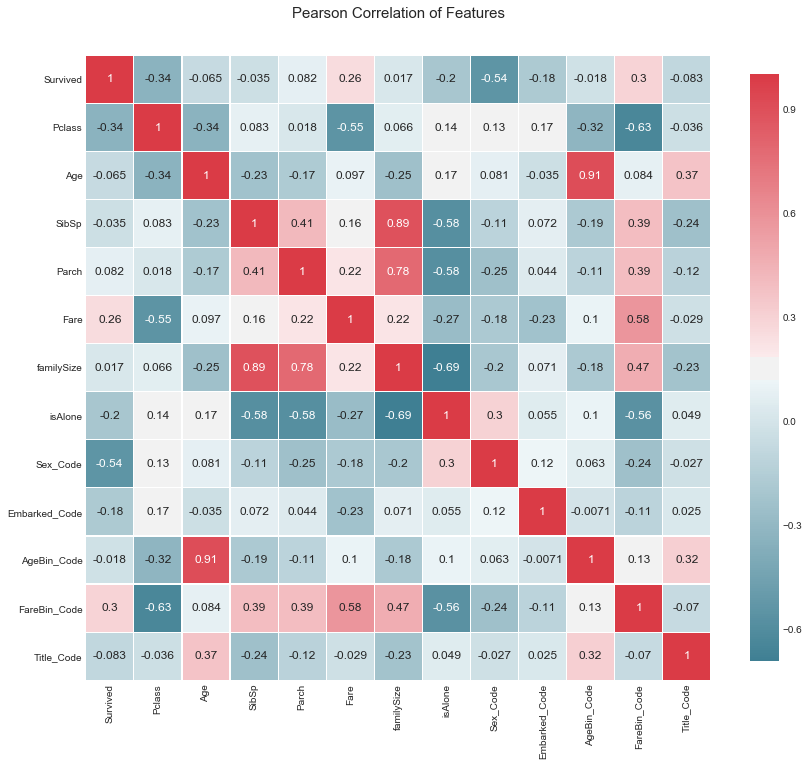

In [72]:
pp.set(xticklabels=[])

#Corelation Heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

####IV - Model Building

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: 
# run model 10x with 60/30 split intentionally leaving out 10%
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]



NameError: name 'data1' is not defined

In [ ]:
row_index = 0

for alg in MLA:    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])

    row_index += 1

NameError: name 'MLA' is not defined

In [1]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_predict.head()

NameError: name 'MLA_compare' is not defined